In [219]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

# 과학적 표기법(Scientific notation)을 사용하지 않는 경우
pd.options.display.float_format = '{:.4f}'.format

In [220]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-07-btc-krw-3.csv") # csv load

In [221]:
df.dtypes # identifying column type 

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [222]:
df.dtypes # identifying column type 

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [223]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [224]:
df

,timestamp,quantity,price,fee,amount,side
0,2018-07-15 11:30:00,0.9514,7119000,0,6773017,1
1,2018-07-15 11:30:00,0.1547,7118000,0,1101155,1
2,2018-07-15 11:34:00,5.0000,7114000,0,-35570000,0
3,2018-07-15 11:47:00,0.0962,7114000,0,684367,1
4,2018-07-15 11:47:00,0.0962,7114000,0,684367,1
...,...,...,...,...,...,...
1041,2018-07-16 23:59:00,0.0142,7384000,0,104853,1
1042,2018-07-16 23:59:00,0.1505,7384000,0,1111292,1
1043,2018-07-17 00:00:00,0.3153,7385000,0,2328491,1
1044,2018-07-17 00:00:00,0.0139,7385000,0,-102652,0


In [225]:
# quantity에 부호 붙이기
for i, row in df.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df.at[i,'sign_quantity'] = row["quantity"]

In [226]:
df.head(8)

,timestamp,quantity,price,fee,amount,side,sign_quantity
0,2018-07-15 11:30:00,0.9514,7119000,0,6773017,1,0.9514
1,2018-07-15 11:30:00,0.1547,7118000,0,1101155,1,0.1547
2,2018-07-15 11:34:00,5.0000,7114000,0,-35570000,0,-5.0000
3,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962
4,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962
5,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962
6,2018-07-15 11:47:00,1.6419,7117000,0,11685402,1,1.6419
7,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962


In [227]:
sign_quantity_cumsum=df["sign_quantity"].cumsum()
sign_quantity_cumsum

0       0.9514
1       1.1061
2      -3.8939
3      -3.7977
4      -3.7015
         ...  
1041    0.6402
1042    0.7907
1043    1.1060
1044    1.0921
1045    1.1060
Name: sign_quantity, Length: 1046, dtype: float64

In [228]:
amount_cumsum=df["amount"].cumsum()
amount_cumsum

0        6773017
1        7874172
2      -27695828
3      -27011461
4      -26327094
          ...   
1041     4623991
1042     5735283
1043     8063774
1044     7961122
1045     8063801
Name: amount, Length: 1046, dtype: int64

In [229]:
sign_quantity_cumsum = sign_quantity_cumsum.astype('float16')

In [230]:
cumsum_df = pd.concat([df,sign_quantity_cumsum,amount_cumsum],axis=1)

In [231]:
cumsum_df

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity,amount
0,2018-07-15 11:30:00,0.9514,7119000,0,6773017,1,0.9514,0.9512,6773017
1,2018-07-15 11:30:00,0.1547,7118000,0,1101155,1,0.1547,1.1064,7874172
2,2018-07-15 11:34:00,5.0000,7114000,0,-35570000,0,-5.0000,-3.8945,-27695828
3,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962,-3.7969,-27011461
4,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962,-3.7012,-26327094
...,...,...,...,...,...,...,...,...,...
1041,2018-07-16 23:59:00,0.0142,7384000,0,104853,1,0.0142,0.6401,4623991
1042,2018-07-16 23:59:00,0.1505,7384000,0,1111292,1,0.1505,0.7905,5735283
1043,2018-07-17 00:00:00,0.3153,7385000,0,2328491,1,0.3153,1.1064,8063774
1044,2018-07-17 00:00:00,0.0139,7385000,0,-102652,0,-0.0139,1.0918,7961122


In [232]:
cumsum_df.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum
0,2018-07-15 11:30:00,0.9514,7119000,0,6773017,1,0.9514,0.9512,6773017
1,2018-07-15 11:30:00,0.1547,7118000,0,1101155,1,0.1547,1.1064,7874172
2,2018-07-15 11:34:00,5.0000,7114000,0,-35570000,0,-5.0000,-3.8945,-27695828
3,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962,-3.7969,-27011461
4,2018-07-15 11:47:00,0.0962,7114000,0,684367,1,0.0962,-3.7012,-26327094
...,...,...,...,...,...,...,...,...,...
1041,2018-07-16 23:59:00,0.0142,7384000,0,104853,1,0.0142,0.6401,4623991
1042,2018-07-16 23:59:00,0.1505,7384000,0,1111292,1,0.1505,0.7905,5735283
1043,2018-07-17 00:00:00,0.3153,7385000,0,2328491,1,0.3153,1.1064,8063774
1044,2018-07-17 00:00:00,0.0139,7385000,0,-102652,0,-0.0139,1.0918,7961122


In [233]:
cumsum_df_zero_point=cumsum_df[ (cumsum_df['sign_quantity_cumsum(coin)'] < 0.00001) & (cumsum_df['sign_quantity_cumsum(coin)'] > -0.00001)]

In [234]:
compare=cumsum_df_zero_point['amount_cumsum']
compare=compare.shift(1)[:]
compare

Series([], Name: amount_cumsum, dtype: float64)

In [235]:
cumsum_df_zero_point = pd.concat([cumsum_df_zero_point,compare],axis=1)
cumsum_df_zero_point=cumsum_df_zero_point.fillna(0)
cumsum_df_zero_point

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,amount_cumsum


In [236]:
cumsum_df_zero_point.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare


In [237]:
cumsum_df_zero_point['point_amount_cumsum'] = cumsum_df_zero_point['amount_cumsum'] - cumsum_df_zero_point['compare']

In [238]:
cumsum_df_zero_point=cumsum_df_zero_point.fillna(0)
cumsum_df_zero_point

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum


[Text(0, 0, '$0$'),
 Text(0, 0, '$03/07$'),
 Text(0, 0, '$03/13$'),
 Text(0, 0, '$03/20$'),
 Text(0, 0, '$03/26$')]

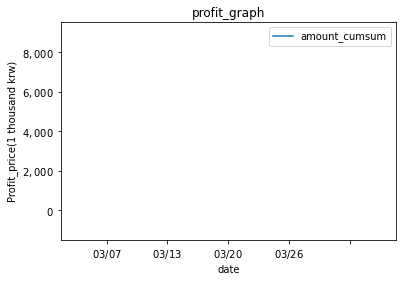

In [239]:
profit_graph=cumsum_df_zero_point[['amount_cumsum']].plot(title='profit_graph')
profit_graph.set_xlabel('date')
profit_graph.set_ylabel('Profit_price(1 thousand krw)')
profit_graph.set_yticklabels(['$0$', '$0$','$2,000$','$4,000$','$6,000$','$8,000$','$10,000$', '$12,000$'])
profit_graph.set_xticklabels(['$0$', '$03/07$', '$03/13$', '$03/20$', '$03/26$'])

In [240]:
profit_point_graph_table=cumsum_df_zero_point[['timestamp', 'point_amount_cumsum']]
profit_point_graph_table.to_csv("/Users/hamin/ITE3035_Python/Data_Science/endingPrice/profit_point.csv", header=True, index=True, encoding = 'utf-8')
profit_point_graph_table

,timestamp,point_amount_cumsum
